In [1]:
"""
My name is Andrew Dodds and this script was developed on 11/19/2025.

The goal for this project is to build a predictive model for a binary classification problem
using supervised learning for predicting class labels with the dependent variable as y.

In AD_P3_Data_Preprocessing.ipynb, I cleaned and prepared the csv file for modeling and analysis.
In this script I will try to get a deeper understanding of the data through visualization
to check for any data issues, show correlations, and find potential good features.
"""

'\nMy name is Andrew Dodds and this script was developed on 11/19/2025.\n\nThe goal for this project is to build a predictive model for a binary classification problem\nusing supervised learning for predicting class labels with the dependent variable as y.\n\nIn AD_P3_Data_Preprocessing.ipynb, I cleaned and prepared the csv file for modeling and analysis.\nIn this script I will try to get a deeper understanding of the data through visualization\nto check for any data issues, show correlations, and find potential good features.\n'

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
# Read the data from the CSV file into a DataFrame and display the data
pd.set_option('display.max_columns', None) # Display alone does not work because there are too many columns so force display all columns
data = pd.read_csv('p3_cleaned_data.csv')
data = data.drop("Unnamed: 0", axis = 1)
originalData = data # Storing the unmodified data for later use
display(data)

,y,x2,x3,x5,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x28,x29,x31,x6
0,1,54359,0,50,5,5,5,4,3,5.0,3,3,4,5,5,3,4,3,21,12.0,0,0,1,192,2.380952,50
1,1,84649,0,44,1,1,1,1,3,3.0,1,4,4,4,4,4,4,2,0,0.0,1,0,1,1034,6.415983,44
2,0,59015,0,72,3,1,5,5,3,2.0,2,3,3,3,3,1,3,2,0,8.0,1,0,3,1452,6.415983,72
3,0,99990,0,38,1,3,1,3,5,1.0,5,5,2,4,4,1,4,5,0,0.0,1,1,3,916,6.415983,38
4,1,83569,1,37,5,5,5,5,2,5.0,5,4,4,4,4,4,4,5,0,0.0,1,0,1,390,6.415983,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104717,1,30483,1,27,5,5,5,5,5,5.0,5,5,3,2,5,3,5,5,70,38.0,1,0,1,1371,0.385714,27
104718,0,23530,0,62,1,4,4,4,4,2.0,4,1,1,1,1,3,1,3,6,33.0,1,0,2,1703,10.333333,62
104719,0,88477,1,45,3,4,3,5,1,3.0,1,1,3,3,5,3,4,1,16,7.0,1,1,3,562,2.812500,45
104720,0,17164,1,57,2,4,2,2,4,2.0,4,4,3,4,5,2,3,4,0,0.0,1,1,2,315,6.415983,57


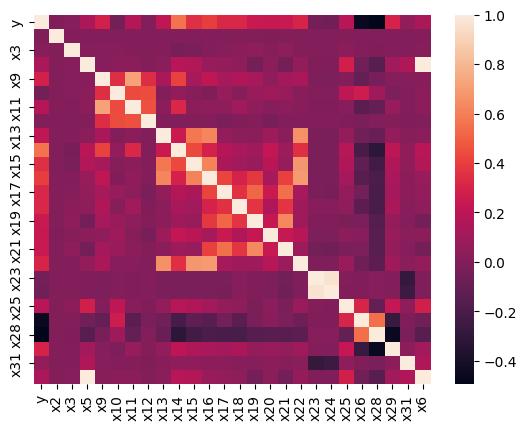

'\nThere are some strong correlations > 0.8 but nothing out of the ordinary. Columns\nx28 and x26 are negatively correlated to some extent, x2, x3, x10, x12, x23, x24\nseem to not have much influence on the dependent variable while the remaining columns\nvary in their positive correlation with y. Some of the features have strong correlations with each other\nespecially near the center of the heatmap but this is expected considering the amount of data\nthat was provided.\n'

In [4]:
# Are there any highly correlated columns/features? How to deal with these columns?
corr_matrix = data.corr()
sns.heatmap(corr_matrix)
plt.show() # There are some strong correlations but nothing out of the ordinary

'''
There are some strong correlations > 0.8 but nothing out of the ordinary. Columns
x28 and x26 are negatively correlated to some extent, x2, x3, x10, x12, x23, x24
seem to not have much influence on the dependent variable while the remaining columns
vary in their positive correlation with y. Some of the features have strong correlations with each other
especially near the center of the heatmap but this is expected considering the amount of data
that was provided.
'''

In [5]:
# Check for missing data
data.isna().sum()

y      0
x2     0
x3     0
x5     0
x9     0
x10    0
x11    0
x12    0
x13    0
x14    0
x15    0
x16    0
x17    0
x18    0
x19    0
x20    0
x21    0
x22    0
x23    0
x24    0
x25    0
x26    0
x28    0
x29    0
x31    0
x6     0
dtype: int64

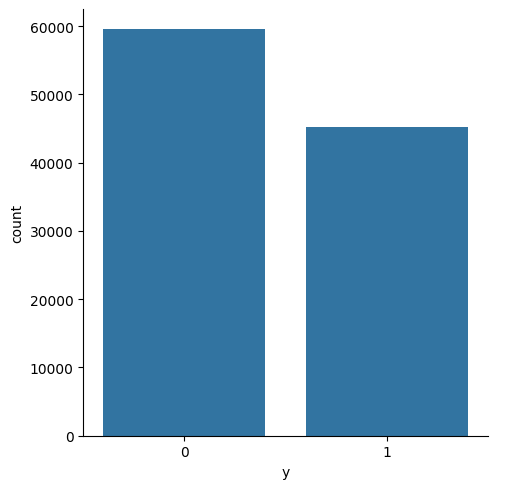

In [6]:
# Checking for imbalanced data
# There appears to be some data imbalance ~ 60000 for y = 0 and ~ 45000 for y = 1
# The balance is at least not very significant but can still impact models.
sns.catplot(x = 'y', data = data, kind = "count")

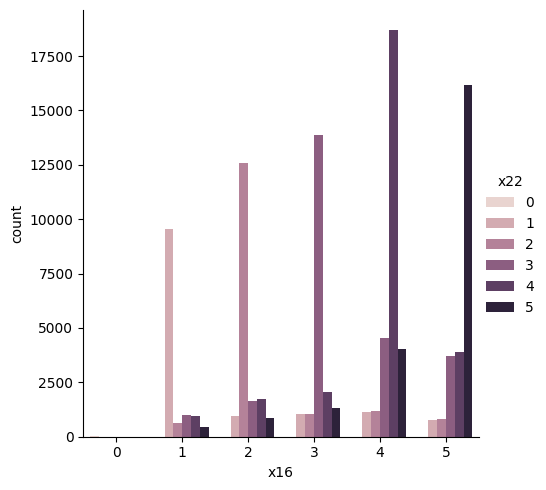

'\nFor each value of x16 the corresponding value for x22 has by far the most\ninfluence meaning these two variables are highly correlated.\n'

In [7]:
'''
I noticed in the heatmap there were a few potential good features so the
following scatterplots for continuous variables and countplots for discrete
variables highlight their relationships
'''
sns.catplot(data = data, kind = 'count', x = 'x16', hue = 'x22')
plt.show()

'''
For each value of x16 the corresponding value for x22 has by far the most
influence meaning these two variables are highly correlated.
'''

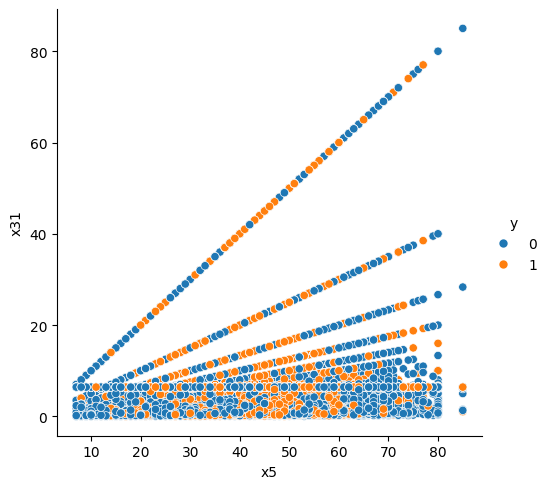

'\nI thought x5 and x31 would have a linear relationship but x31 looks like its some\nsort of combination of x5 and other data because it forms multiple lines with x5\nbut is also clearly influenced by something else as well.\n'

In [8]:
sns.relplot(data = data, kind = 'scatter', x = 'x5', y = 'x31', hue = 'y')
plt.show()
'''
I thought x5 and x31 would have a linear relationship but x31 looks like its some
sort of combination of x5 and other data because it forms multiple lines with x5
but is also clearly influenced by something else as well.
'''

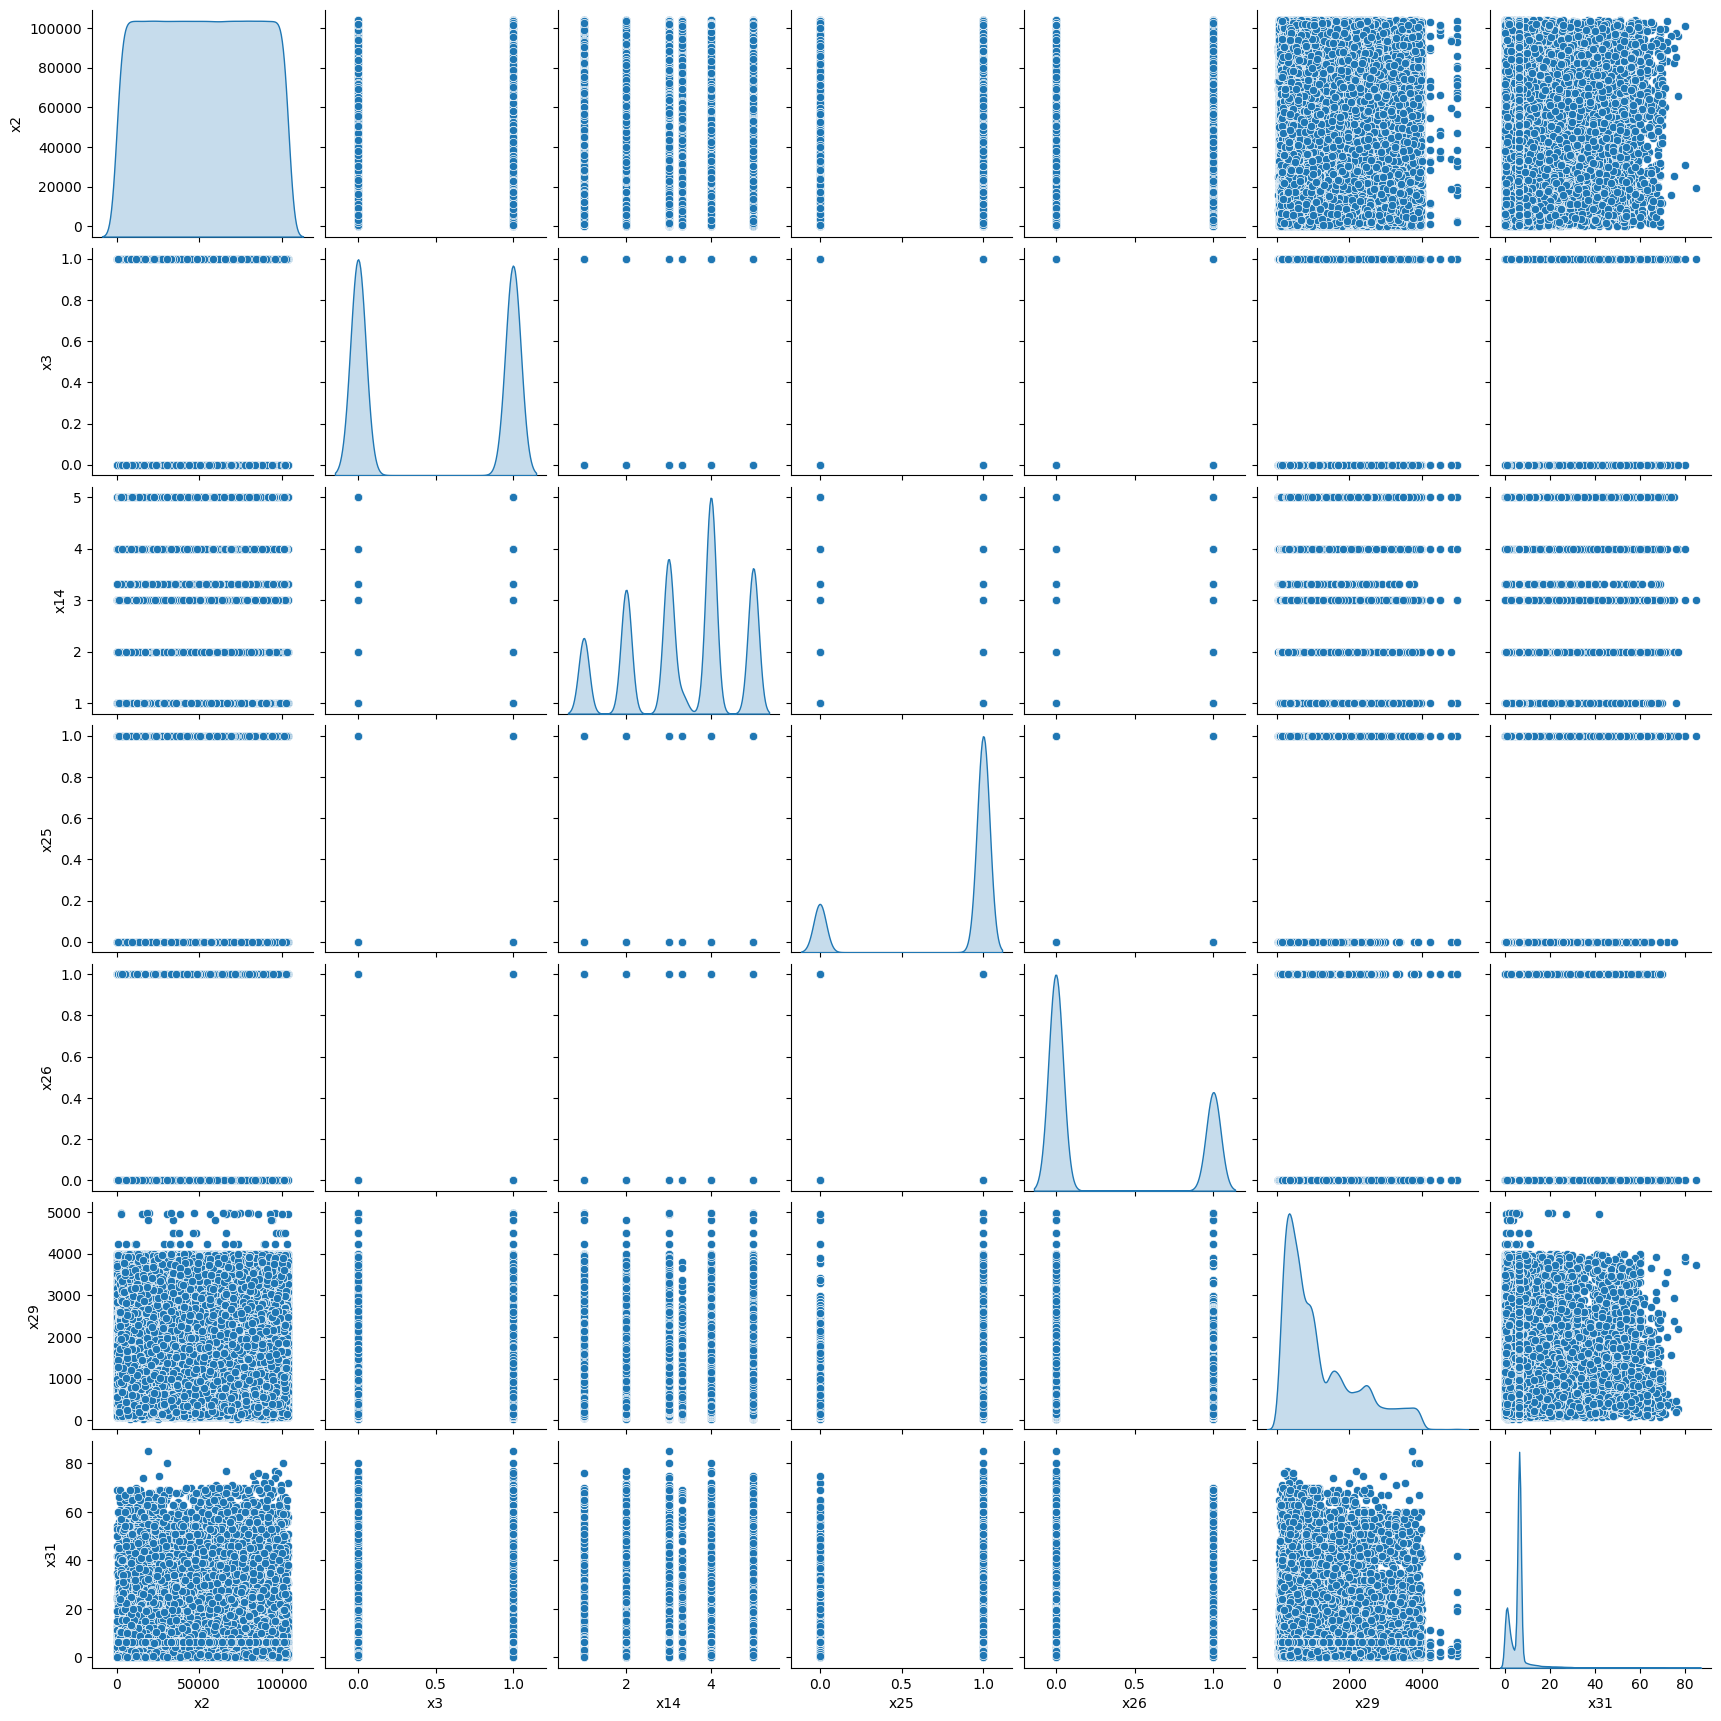

In [9]:
# In the previous homework I made a pairplot of all the columns that were cleaned
sns.pairplot(data[["x2","x3","x14", "x25", "x26", "x29", "x31"]], diag_kind='kde')
plt.show()